In [1]:
from google.colab import drive
drive.mount('/gdrive')


# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Mounted at /gdrive
2.13.0


# Load Data

In [2]:
 %cd /gdrive/MyDrive/UNIVERSITA/ANN/LABS/LAB_1/Lecture 1

/gdrive/MyDrive/UNIVERSITA/ANN/LABS/LAB_1/Lecture 1


In [3]:
dataframe =  pd.read_csv('penguins.csv')

print('penguins dataset shape', dataframe.shape)
dataframe.head(10)

penguins dataset shape (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### Pre-processing: dropping Nan

In [4]:
dataframe = dataframe.dropna()

In [5]:
dataframe.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### choose target

In [6]:
# Get the target values from the dataset
target = dataframe['species']
print('Target shape', target)
print('Target shape', target.shape)

# and separate it from the dataset ??

dataframe = dataframe.drop(columns=['species'])


Target shape 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object
Target shape (333,)


In [7]:
# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u, c in zip(unique, count):
    print(f'Class {u} has {c} samples')



Target labels: ['Adelie' 'Chinstrap' 'Gentoo']
Class Adelie has 146 samples
Class Chinstrap has 68 samples
Class Gentoo has 119 samples


 ### plot data

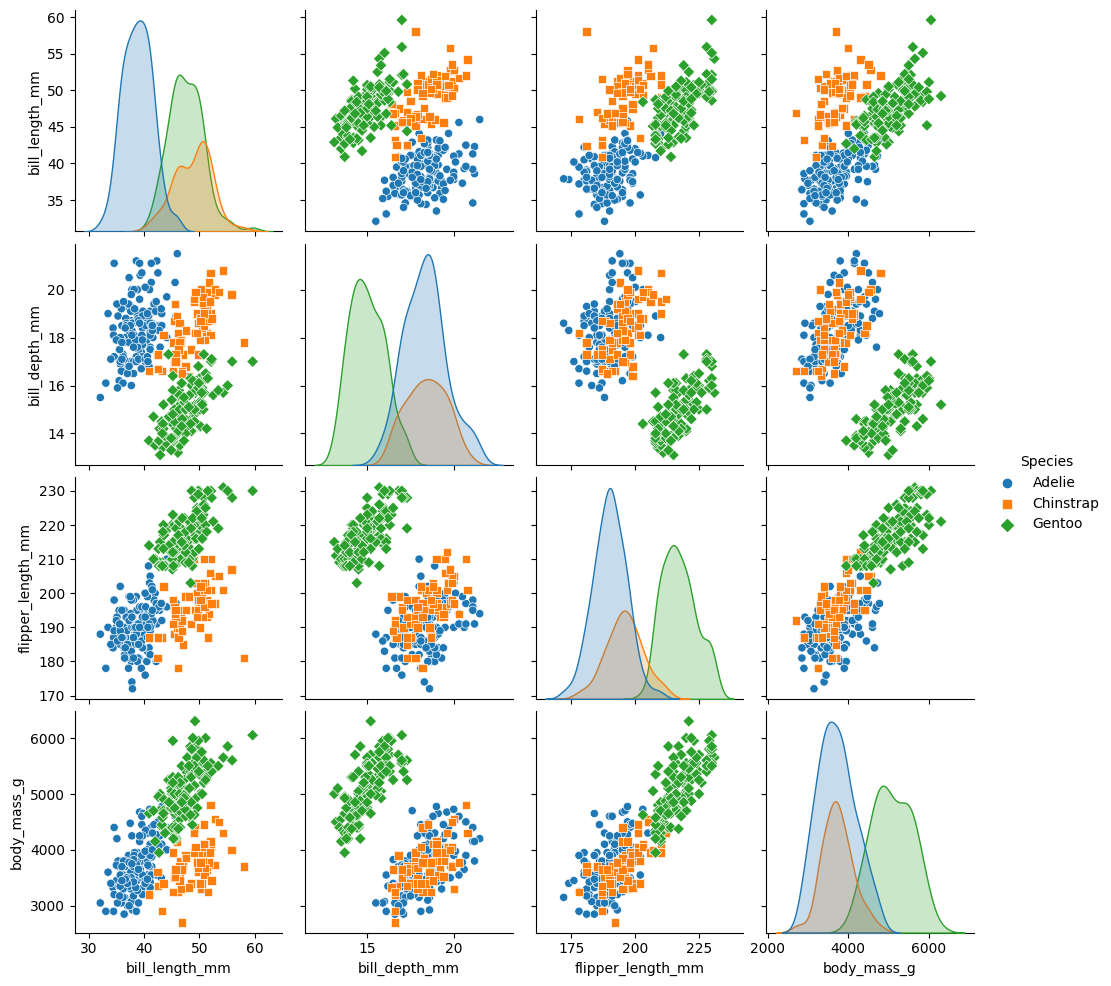

In [8]:
# Copy the dataset, assign target labels, and plot using seaborn
plot_dataset = dataframe.copy()
plot_dataset["Species"] = target
sns.pairplot(plot_dataset, hue="Species", palette="tab10", markers=["o", "s", "D"],)
plt.show()
del plot_dataset # Clean up

### split dataset: choose dimension of validation and test set

In [9]:
dim_test_data = 100

# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    dataframe,
    target,
    test_size = dim_test_data,
    random_state = seed,
    stratify = target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = dim_test_data,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (133, 6) (133,)
Validation set shape:	 (100, 6) (100,)
Test set shape:		 (100, 6) (100,)


### Min Max normalized

In [10]:
import pandas as pd

def normalizza_numeriche(df):
    # Copia il dataframe per evitare di modificarlo direttamente
    df_norm = df.copy()

    # Seleziona solo le colonne numeriche
    numeriche = df_norm.select_dtypes(include=['float64', 'int64'])

    # Normalizza le colonne numeriche
    for col in numeriche.columns:
        min_val = df_norm[col].min()
        max_val = df_norm[col].max()
        df_norm[col] = (df_norm[col] - min_val) / (max_val - min_val)

    return df_norm

max_df = X_train.max()
min_df = X_train.min()

# Chiama la funzione per normalizzare le variabili numeriche
X_train = normalizza_numeriche(X_train)
X_val = normalizza_numeriche(X_val)
X_test = normalizza_numeriche(X_test)

X_train.head()


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
259,Biscoe,0.620408,0.266667,0.607143,0.790323,MALE
337,Biscoe,0.624490,0.333333,0.857143,1.000000,MALE
320,Biscoe,0.612245,0.173333,0.803571,0.629032,FEMALE
161,Dream,0.726531,0.826667,0.428571,0.258065,MALE
334,Biscoe,0.518367,0.053333,0.767857,0.475806,FEMALE


### Transform the labels

In [11]:
# Transform labels via one-hot encoding
# i.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
def one_hot_encoding(df):
    # Copia il dataframe per evitare di modificarlo direttamente
    df_encoded = df.copy()

    # Seleziona le colonne categoriche
    categoriche = df_encoded.select_dtypes(include=['object'])

    # Applica one-hot encoding
    df_encoded = pd.get_dummies(df_encoded, columns=categoriche.columns)

    return df_encoded

X_train = one_hot_encoding(X_train)
X_val = one_hot_encoding(X_val)
X_test = one_hot_encoding(X_test)

####
from sklearn.preprocessing import LabelEncoder
# Inizializza un oggetto LabelEncoder
encoder = LabelEncoder()
# Addestra l'encoder sulle etichette di classe del training set
encoder.fit(y_train)
encoder.fit(y_val)
encoder.fit(y_test)

# Applica la trasformazione alle etichette di classe del training set
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))

print('Training set target shape:\t',y_train.shape)
print('Validation set target shape:\t',y_val.shape)
print('Test set target shape:\t\t',y_test.shape)

Training set target shape:	 (133, 3)
Validation set target shape:	 (100, 3)
Test set target shape:		 (100, 3)


# NN shape

### choose bach size and number of epochs

In [12]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 200

Input shape of the network (9,)
Output shape of the network 3


### Build the model: choose learning rate


In [13]:
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

### Model summary

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 9)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               1280      
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1667 (6.51 KB)
Trainable params: 1667 (6.51 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

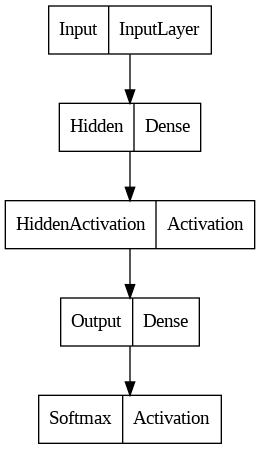

In [14]:
model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model)

### Train the model

In [15]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/200
9/9 [==============================] - 1s 37ms/step - loss: 1.0390 - Accuracy: 0.3684 - val_loss: 1.0262 - val_Accuracy: 0.3600
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 1.0106 - Accuracy: 0.5188 - val_loss: 1.0014 - val_Accuracy: 0.5100
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.9856 - Accuracy: 0.5414 - val_loss: 0.9776 - val_Accuracy: 0.5500
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.9622 - Accuracy: 0.6917 - val_loss: 0.9565 - val_Accuracy: 0.6800
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.9412 - Accuracy: 0.7293 - val_loss: 0.9367 - val_Accuracy: 0.7500
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 0.9211 - Accuracy: 0.7594 - val_loss: 0.9182 - val_Accuracy: 0.7400
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.9016 - Accuracy: 0.7519 - val_loss: 0.9002 - val_Accuracy: 0.7400
Epoch 8/200
9/9 [=========

### Visualization

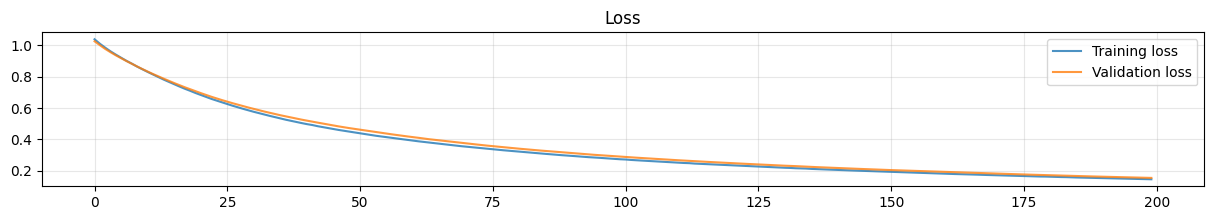

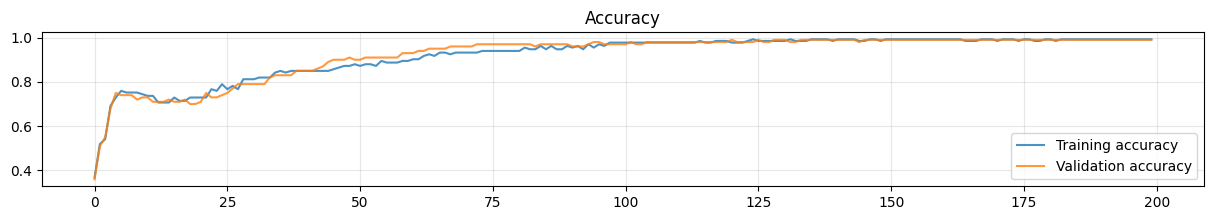

In [16]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_Accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

 ### Save the model

In [17]:
model.save('Penguins_FFNN')
model = tfk.models.load_model('Penguins_FFNN')
model.summary()

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 9)]               0         
                                                                 
 Hidden (Dense)              (None, 128)               1280      
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 1667 (6.51 KB)
Trainable params: 1667 (6.51 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

# Inference

In [19]:
# Training set prediction
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax(y_train,axis=-1)

train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')


# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax(y_val, axis=-1)

val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax(y_test, axis=-1)

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

Accuracy score over the train set: 0.9925
Accuracy score over the validation set: 0.99
4/4 [==============================] - 0s 4ms/step
Accuracy score over the test set: 0.98
